In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
df = pd.read_csv("LDC_Train.csv")

In [174]:
df.head()

Text Label
0  पणजी : वाहन अपघातामुळे एखाद्या व्यक्तीचा बळी ग...  Auto
1  नवी दिल्ली : साधारण शंभर वर्षांपूर्वी बाजारात ...  Auto
2  नवी दिल्ली : लक्झरी कार निर्माता लेक्सस (Lexus...  Auto
3  निस्सान या जपानच्या वाहन निर्माता कंपनीने भारत...  Auto
4  सुरत : इच्छा तिथे मार्ग!हे सुरतच्या एका 60 वर्...  Auto

In [175]:
df.shape

(22025, 2)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22025 entries, 0 to 22024
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    20436 non-null  object
 1   Label   22025 non-null  object
dtypes: object(2)
memory usage: 344.3+ KB


In [177]:
df.describe()

Text       Label
count                                               20436       22025
unique                                              16424          13
top     मुंबई - जेव्हापासून खोके सरकार महाराष्ट्राच्या...  Manoranjan
freq                                                   89        2986

In [228]:
df.duplicated().sum()

5307

In [229]:
df = df.drop_duplicates()

In [230]:
df.shape

(16718, 2)

In [231]:
df['Label'].value_counts().reset_index()

Label  count
0           Crime   2124
1            Tech   2103
2        Politics   2101
3   International   1981
4          Health   1917
5          Sports   1707
6            Auto   1655
7          Bhakti   1298
8          Travel    690
9       Education    680
10        Fashion    423
11     Manoranjan     38
12          Label      1

In [232]:
import plotly.express as px
import plotly.graph_objects as go

In [233]:
fig = px.histogram(df, x='Label', color='Label')
fig.update_layout(xaxis_title='News Type', yaxis_title='Total Articles')
fig.show()

In [234]:
categories = ['Auto', 'Politics', 'Sports', 'Tech', 'International']
df = df[df['Label'].isin(categories)]

In [235]:
df = df.groupby('Label', group_keys=False).sample(n = 1600, random_state = 69)

In [236]:
df['Label'].value_counts()

Label
Auto             1600
International    1600
Politics         1600
Sports           1600
Tech             1600
Name: count, dtype: int64

In [248]:
df['length'] = df['Text'].fillna("").astype(str).apply(len)

In [249]:
df.head()

Text Label  word_count  \
1317  केंद्र सरकारचा पेट्रोल डिझेलवर जास्त दिसत असला...  Auto         188   
575   भारतीय बाजारपेठेत स्पेशियस आणि मोठ्या कार्सची ...  Auto         262   
665   भारतीय बाजारपेठेत इलेक्ट्रीक व्हेईकल सेगमेंटमध...  Auto         283   
535   Tata Motors पुण्यातील उत्पादन प्रकल्पात नुकत्य...  Auto         182   
450   देशात कार खरेदी करणाऱ्या लोकांची संख्या वाढतान...  Auto         245   

      length  
1317    1287  
575     1710  
665     1826  
535     1299  
450     1669

In [250]:
df = df.reset_index()

In [251]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df.head()

index                                               Text Label  word_count  \
0   1317  केंद्र सरकारचा पेट्रोल डिझेलवर जास्त दिसत असला...  Auto         193   
1    575  भारतीय बाजारपेठेत स्पेशियस आणि मोठ्या कार्सची ...  Auto         254   
2    665  भारतीय बाजारपेठेत इलेक्ट्रीक व्हेईकल सेगमेंटमध...  Auto         272   
3    535  Tata Motors पुण्यातील उत्पादन प्रकल्पात नुकत्य...  Auto         184   
4    450  देशात कार खरेदी करणाऱ्या लोकांची संख्या वाढतान...  Auto         245   

   length  
0    1287  
1    1710  
2    1826  
3    1299  
4    1669

In [252]:
Total_words=sum(df['word_count'])
Total_words

1791679

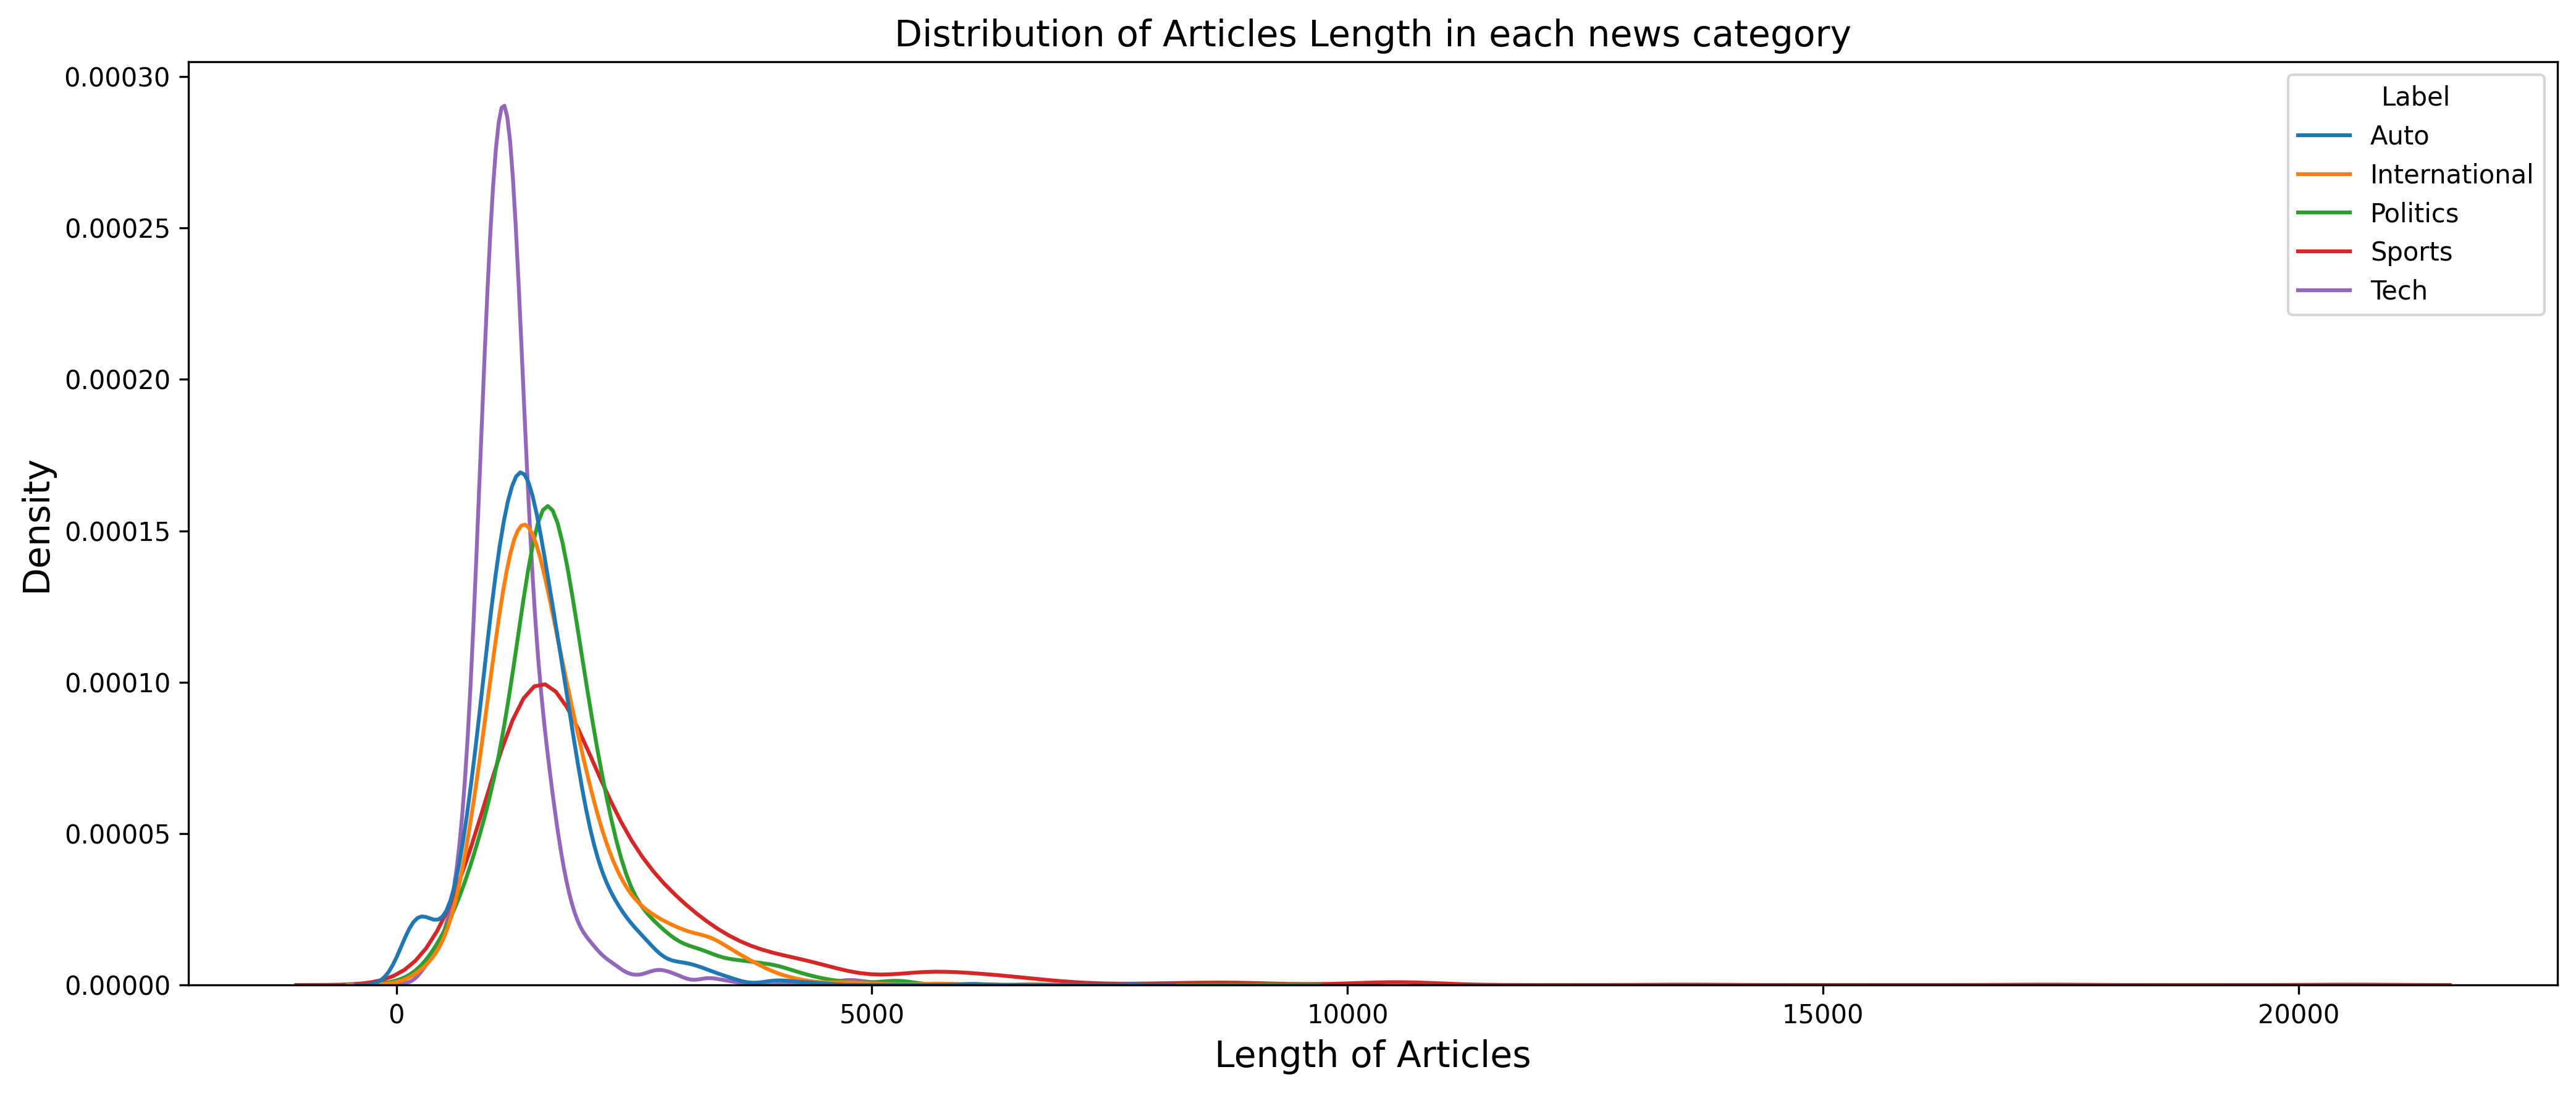

In [192]:
plt.figure(figsize=(14,6), dpi = 300)
sns.kdeplot(data = df, x = df['length'], hue=df['Label'])
plt.title('Distribution of Articles Length in each news category', color='black', fontsize=14)
plt.xlabel('Length of Articles', color='black', fontsize=14)
plt.ylabel('Density', color='black', fontsize=14)
plt.tight_layout()
plt.show()

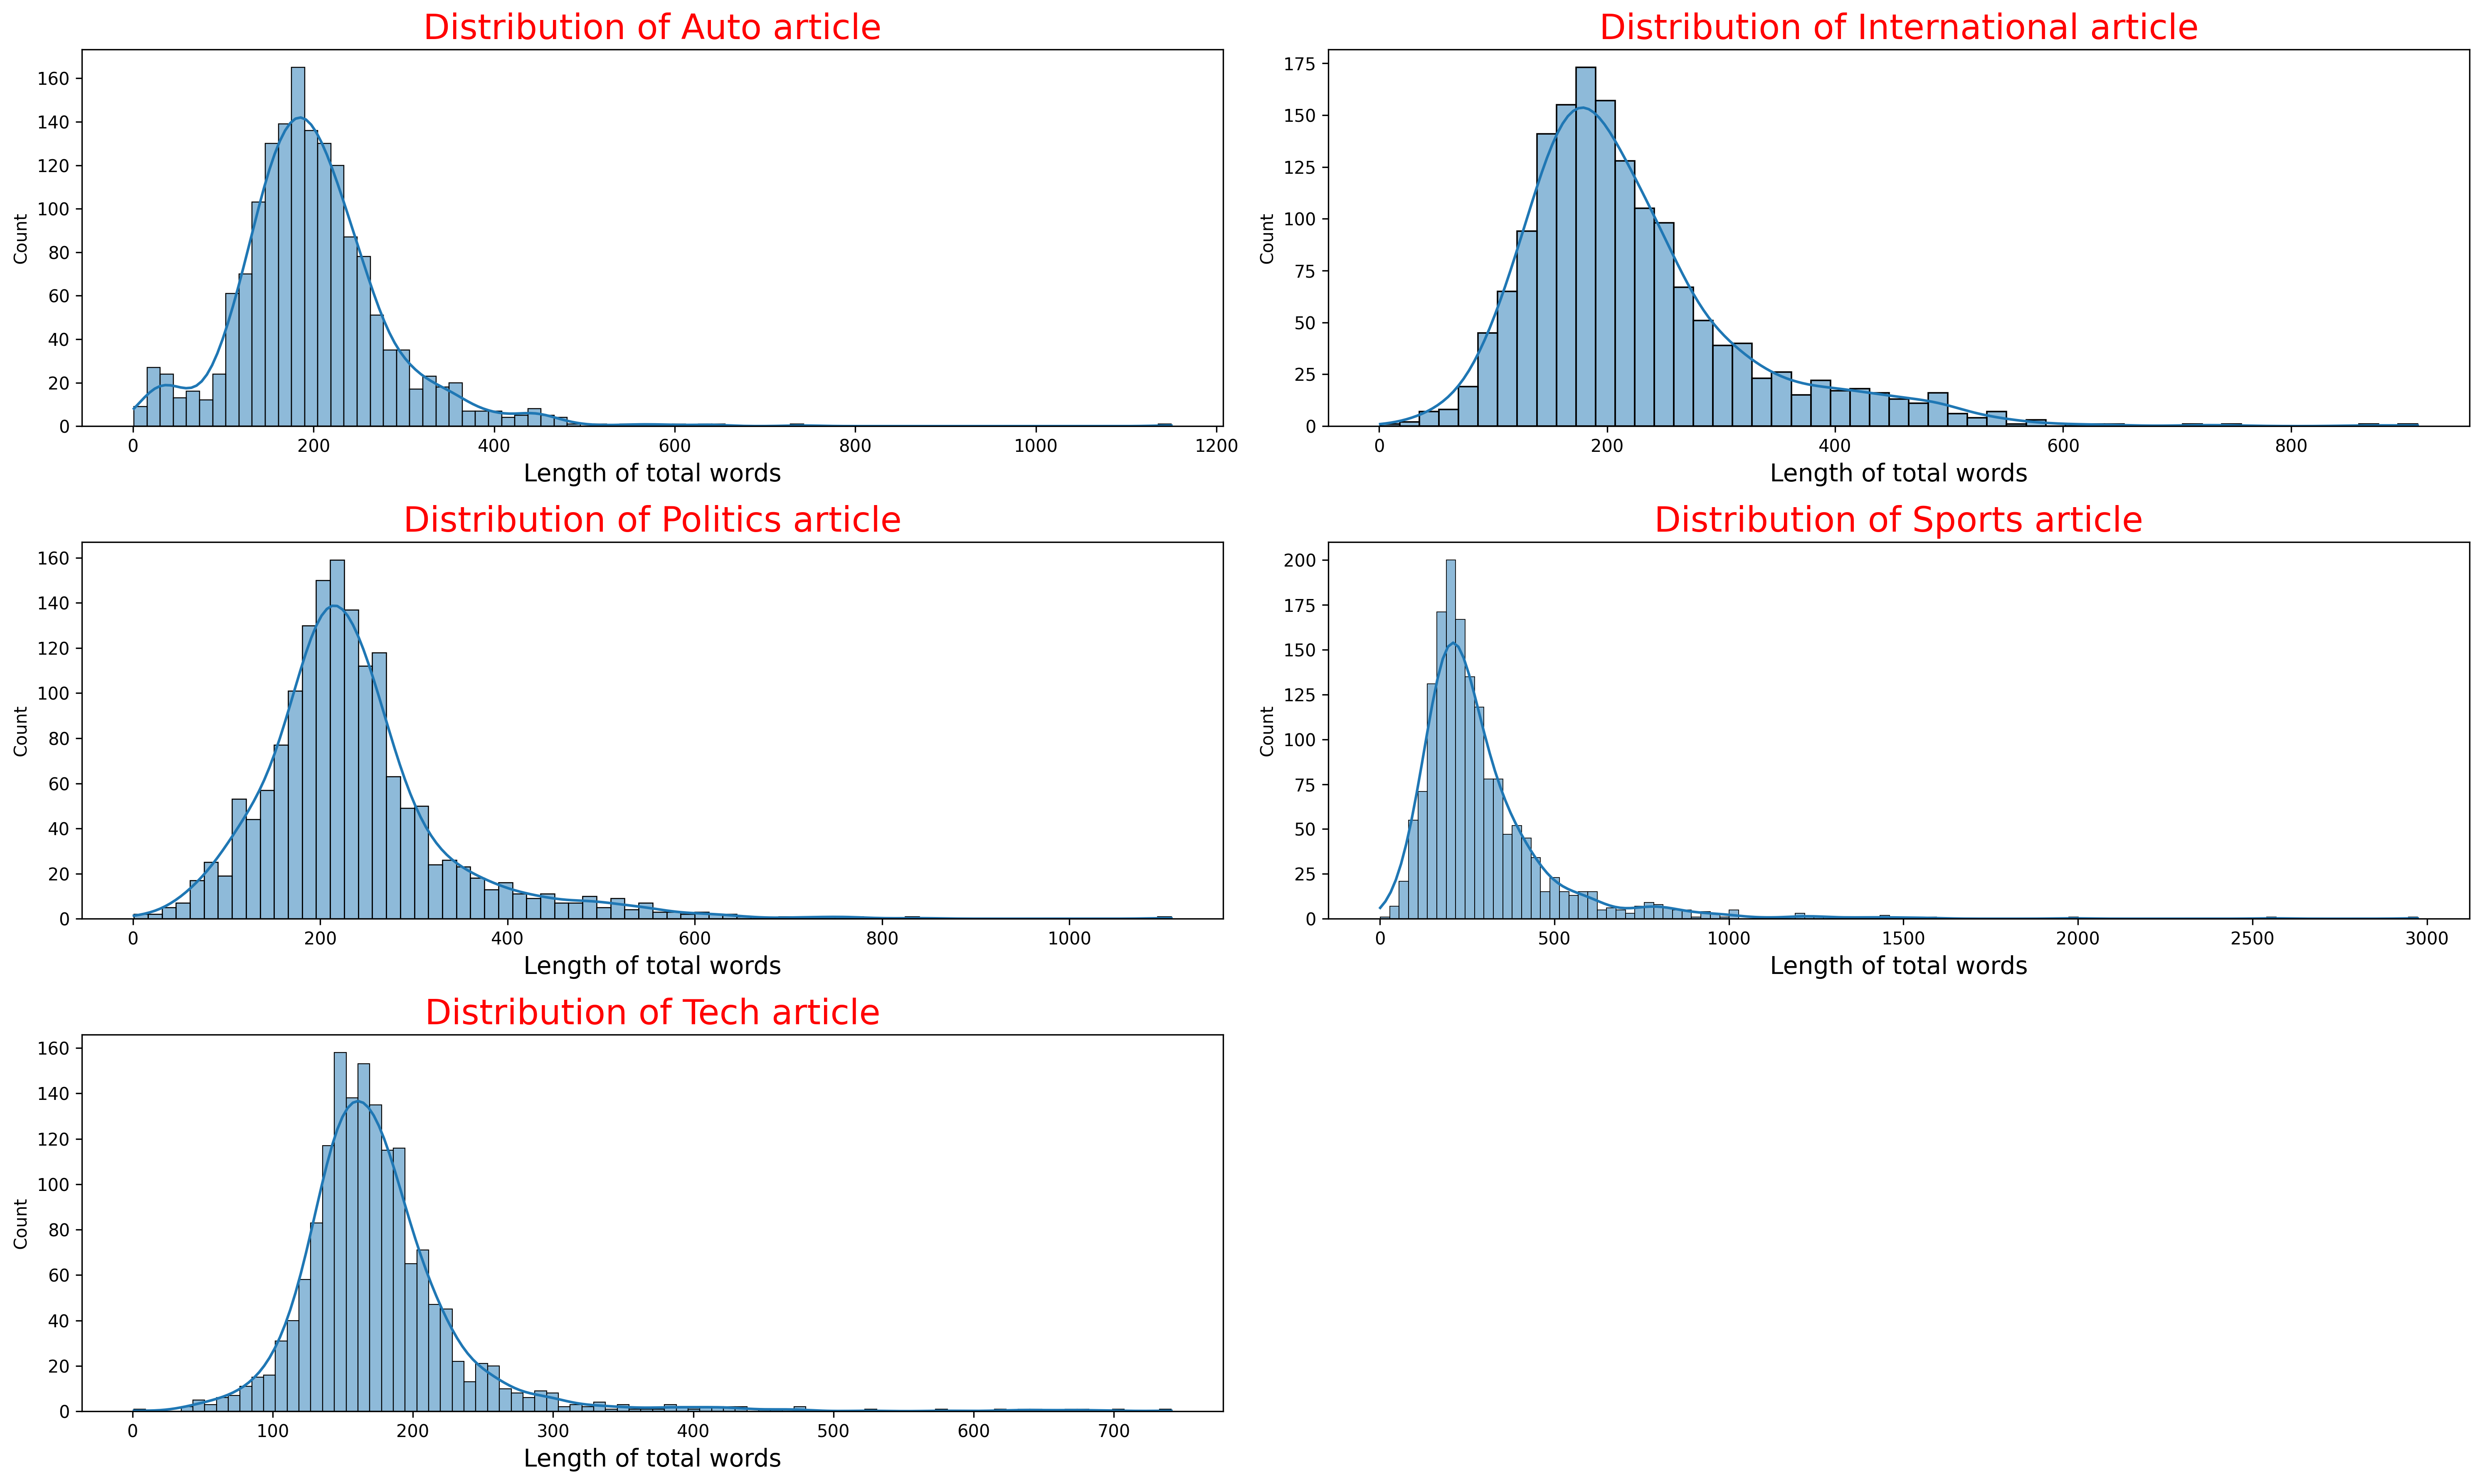

In [193]:
import math

types_article = df['Label'].unique()
n_plots = len(types_article)
n_cols = 2
n_rows = math.ceil(n_plots / n_cols)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4), dpi = 300)
axs = axs.flatten()  # Flatten the array for easy iteration

for i, article in enumerate(types_article):
    ax = axs[i]
    sns.histplot(x=df[df['Label'] == article]['word_count'], kde=True, ax=ax)
    ax.set_title(f'Distribution of {article} article', size=20, color='red')
    ax.set_xlabel('Length of total words', fontsize=14, color='black')

# Remove any unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [240]:
df['Text'] = df['Text'].apply(lambda x: x.decode('utf-8', 'ignore') if isinstance(x, bytes) else x)


In [195]:
''' 
pip install stopwordsiso : mr (marathi) has only 99 stopwords
en (English) has 1298 stopwords
So we'll define our own stopwords set
'''

" \npip install stopwordsiso : mr (marathi) has only 99 stopwords\nen (English) has 1298 stopwords\nSo we'll define our own stopwords set\n"

In [196]:
with open("marathi_stopwords.txt", "r", encoding="utf-8") as file:
    stopwords_set = {line.strip() for line in file if line.strip()}

print(stopwords_set)

{'करता', 'इतके', 'तीच', 'बऱ्याच', 'होत', 'ला', 'असल', 'याच', 'झाली', 'असतं', 'पासून', 'सारखे', 'अधिक', 'तिच्यावर', 'जस', 'असलेला', 'इतक्या', 'एक', 'त्याचवेळी', 'कर', 'रत', 'नंतर', 'करावे', 'यांना', 'जाते', 'आपला', 'निश्चितच', 'पर्यंत', 'तस', 'तसंच', 'व्हावी', 'तच', 'स्वतःचे', 'असून', 'मच', 'नाहीत', 'येऊन', 'त्यांचे', 'असेल', 'यांच्याशी', 'निश्चित', 'त्याचा', 'करण्यात', 'है', 'असताना', 'येत्या', 'ळण', 'यावे', 'त्यावेळी', 'करायची', 'त्याच्यावर', 'तुझे', 'आले', 'आधी', 'व्यकत', 'त्यानंतर', 'म्हणजे', 'करतो', 'होते', 'याचा', 'तरी', 'करू', 'करायचा', 'सगळे', 'तुम्ही', 'आल्या', 'यंदा', 'इतक', 'करताना', 'यावर', 'घेऊन', 'शकतो', 'आध', 'ढण', 'रच', 'पुढील', 'त्यासाठी', 'तह', 'असल्याने', 'त्याने', 'आलेले', 'आलं', 'आलेल्या', 'व्या', 'होतं', 'तू', 'त्यांच्याशी', 'आणख', 'हून', 'करा', 'तिचे', 'फक्त', 'कोणत्या', 'आढळ', 'नुकताच', 'येते', 'करण्याच्या', 'गेल्या', 'अशी', 'आणखी', 'त्यांचा', 'पुन्हा', 'यल', 'यावी', 'असत', 'मिळणार', 'यांचा', 'कमी', 'कधी', 'आमची', 'तर', 'कध', 'यांची', 'करायला', 'आमच', 'तिला', 'आम

In [253]:
df['Text'] = df['Text'].fillna('')

In [198]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0] for word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['आसल'] not in stop_words.



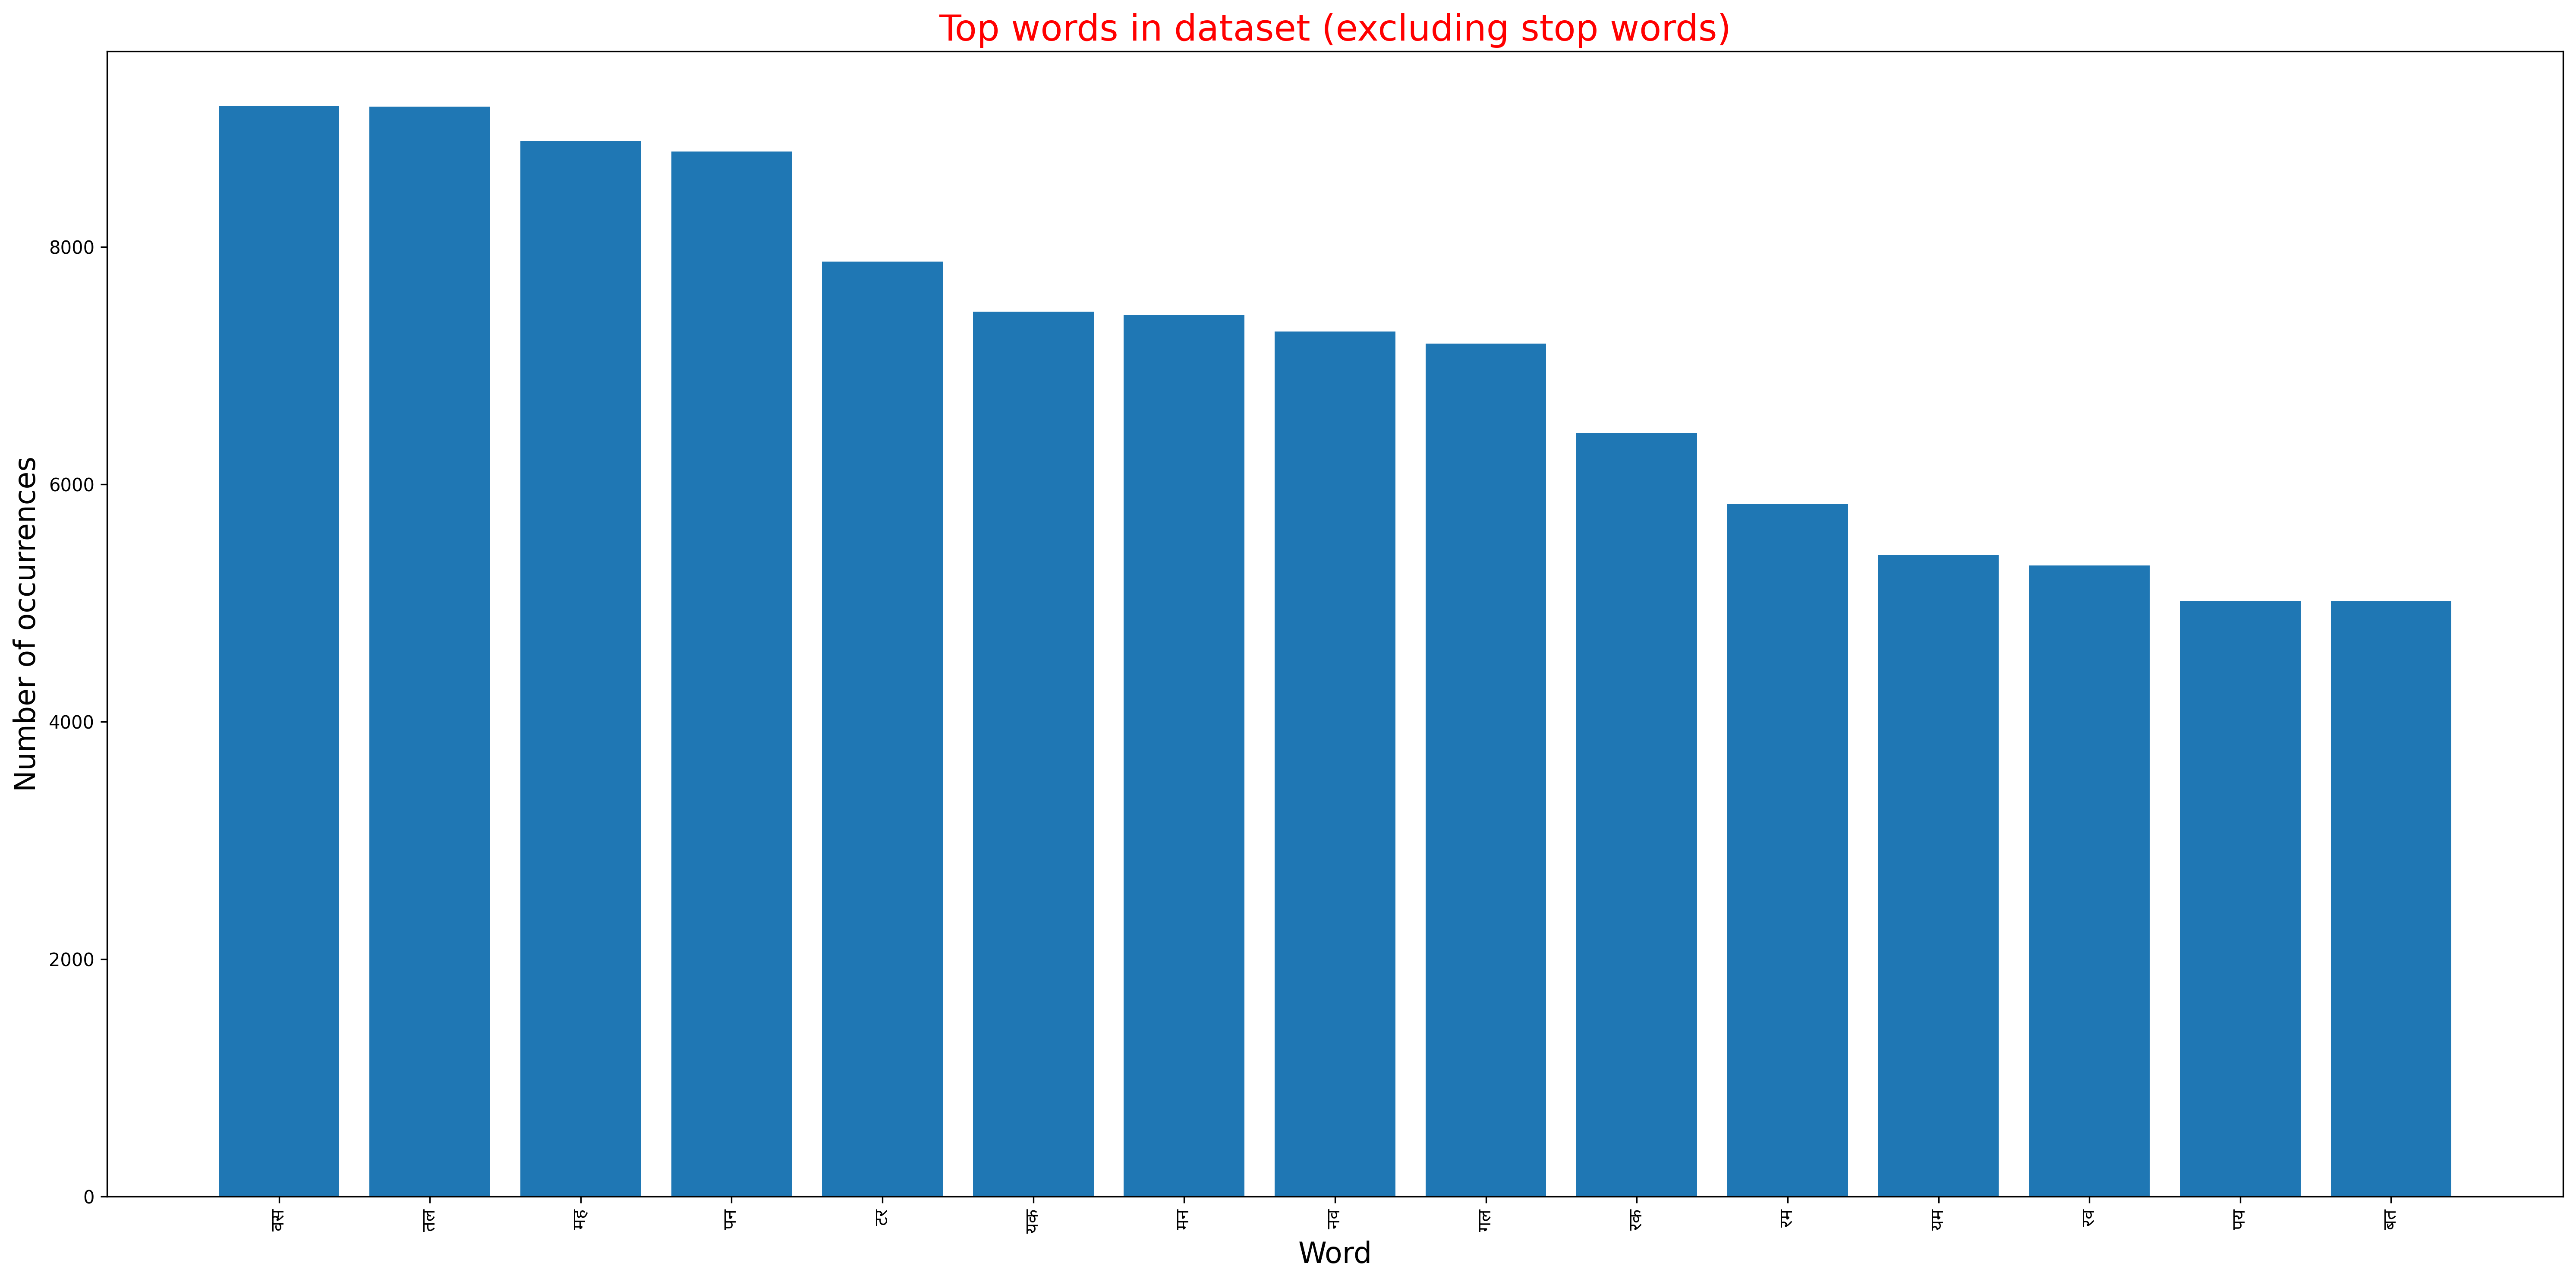

In [319]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words = list(stopwords_set))
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['Text'])


import matplotlib.font_manager as fm

# Path to a font that supports Devanagari (adjust as needed)
font_path = r'NotoSansDevanagari-VariableFont_wdth,wght.ttf'
dev_font = fm.FontProperties(fname=font_path)


fig, ax = plt.subplots(figsize=(20,10), dpi=300)
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))


ax.set_xticklabels(words, rotation='vertical', fontproperties=dev_font)
ax.set_title('Top words in dataset (excluding stop words)', size=20, color='red')
ax.set_xlabel('Word', fontsize = 16, color='black')
ax.set_ylabel('Number of occurrences', fontsize = 16, color='black')

plt.tight_layout()
plt.show()

In [254]:
import re
import string

def clean_text(text):
    all_punct = string.punctuation + "।"
    text = re.sub(f"[{re.escape(all_punct)}]", " ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens = [token for token in tokens if len(token) > 2]
    cleaned_text = " ".join(tokens)

    return cleaned_text

In [255]:
df['Text'] = df['Text'].apply(clean_text)

df['Text'][0]

'केंद्र सरकारचा पेट्रोल डिझेलवर जास्त दिसत असला तरीदेखील त्यातील जास्त हिस्सा राज्यांनाच दिला जातो यामुळे राज्यांनीच त्यांच्या करात कपात करावी असा सल्ला सीतारामन यांनी दिला States getting percent tax which collected from Center Petrol Diesel यामुळे केंद्र सरकारने कमी करावा अशी मागणी साऱ्या राज्यांनी केली आहे काही राज्यांनी व्हॅटमध्ये कपात करून काही प्रमाणावर इंधनाच्या किंमतीदेखील कमी केल्या आहेत तसेच केंद्राने पेट्रोल डिझेल जीएसटीमध्ये घ्यावे अशी मागणी करण्यात येत आहे केंद्र सरकार काही वसूल करते त्यातील टक्के एवढा मोठा हिस्सा राज्यांना दिला जातो यामुळे इंधन दरवाढीवर राज्ये चांगला पर्याय काढू शकतात असे त्या म्हणाल्या यामुळे सांघिक रचनेचा विचार केंद्र आणि राज्य सरकारने करायला हवा आम्ही पेट्रोल डिझेल जीएसटीमध्ये घेण्याबाबत जीएसटी काऊन्सिलमध्ये आपली बाजू मांडू यावर काऊन्सिलने काही निर्णय घेतला त्यावर आम्ही पुढे कार्यवाही करू असे त्या म्हणाल्या आता 2019 नंतर आम्ही निती बनवत आहोत यामध्ये सरकार पोलिसिंग किंवा त्रास देण्याच्या भूमिकेत नसणार असे आम्ही त्यांना दाखविले आहे क्रिप्टो करन्सीबाबत लकर

In [256]:
news_df = df

In [262]:
# Now remove stop words, also add additional stop words discovered during Top words

def load_stopwords(file_path='marathi_stopwords.txt'):
    """
    Load Marathi stopwords from a file into a set.
    Each line in the file should contain one stopword.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = {line.strip() for line in file if line.strip()}
    return stopwords

def remove_stopwords(text):
    """
    Remove stopwords from the provided text.
    
    Parameters:
        text (str): The input text.
        stopwords (set): A set of stopwords to remove.
        
    Returns:
        str: The text after removing stopwords.
    """
    stopwords = load_stopwords("marathi_stopwords.txt")
    # Split text into tokens (assuming words are separated by whitespace)
    tokens = text.split()
    # Filter out tokens that are in the stopwords set
    filtered_tokens = [token for token in tokens if token not in stopwords]
    # Rejoin the tokens back into a single string
    return ' '.join(filtered_tokens)

In [207]:
# Add new stopwords which were found in top words but not stopwords txt file
# Define the old stopwords
old_stopwords = {
    'अद', 'अध', 'अन', 'अश', 'अस', 'असण', 'असल', 'आढळ', 'आण', 'आणख', 'आत', 'आतल',
    'आध', 'आप', 'आपल', 'आम', 'आमच', 'आल', 'आह', 'इतक', 'ईल', 'ऊन', 'एक', 'एकद',
    'कड', 'कत', 'कध', 'कम', 'करण', 'कस', 'चबर', 'चव', 'जर', 'जस', 'ढण', 'णत',
    'तच', 'तब', 'तस', 'तह', 'दरम', 'नच', 'पर', 'पल', 'फक', 'बर', 'बऱ', 'बल', 'बह',
    'मच', 'मध', 'मल', 'यकत', 'यच', 'यल', 'रख', 'रच', 'रण', 'रत', 'रश', 'रस',
    'ळण', 'ळत', 'वग', 'वत', 'वळ', 'शकत', 'षय', 'सगळ', 'सम', 'सर', 'हण', 'हणज', 'हव', 'आसल'
}

# Define the new (more comprehensive) stopwords
new_stopwords = {
    'अद्याप', 'अधिक', 'अनेक', 'अन्य', 'अशा', 'अशी', 'असं', 'असणार', 'असणारा',
    'असणारी', 'असणारे', 'असणाऱ्या', 'असणे', 'असण्याची', 'असत', 'असतं', 'असता',
    'असतात', 'असताना', 'असते', 'असतो', 'असलेला', 'असलेली', 'असलेले', 'आसल्या',
    'असल्याचा', 'असल्याची', 'असल्याचे', 'असल्याने', 'असल्यामुळे', 'असा', 'असू',
    'असून', 'असे', 'असेल', 'असेही', 'असो', 'आज', 'आढळून', 'आणखी', 'आणि', 'आतले',
    'आता', 'आतापर्यंत', 'आधी', 'आपण', 'आपलं', 'आपला', 'आपली', 'आपले', 'आपल्या',
    'आपल्याकडे', 'आपल्याला', 'आपापल्या', 'आमचा', 'आमची', 'आमचे', 'आमच्या', 'आम्ही',
    'आलं', 'आला', 'आली', 'आले', 'आलेला', 'आलेली', 'आलेले', 'आलेल्या', 'आलो', 'आल्या',
    'आहात', 'आहे', 'आहेच', 'आहेत', 'आहोत', 'इतका', 'इतकी', 'इतके', 'इतक्या', 'इतर',
    'एकदा', 'एका', 'कधी', 'कधीही', 'कमी', 'कर', 'करणं', 'करणार', 'करणे', 'करण्याचा',
    'करण्याची', 'करण्याचे', 'करण्याच्या', 'करण्यात', 'करण्यास', 'करण्यासाठी', 'करत',
    'करता', 'करतात', 'करताना', 'करतो', 'करा', 'करायचा', 'करायची', 'करायचे', 'करायला',
    'करावा', 'करावी', 'करावे', 'करीत', 'करू', 'करून', 'कसे', 'का', 'काढणे', 'काय',
    'कारण', 'काळात', 'काही', 'काहीच', 'काहीतरी', 'काहीही', 'किंवा', 'किती', 'कितीही',
    'कित्येक', 'किवा', 'की', 'कुठे', 'केलं', 'केला', 'केली', 'केले', 'केल्या', 'केल्याने',
    'केवळ', 'कोण', 'कोणता', 'कोणताही', 'कोणती', 'कोणतीही', 'कोणते', 'कोणतेही',
    'कोणत्या', 'कोणत्याही', 'कोणाला', 'कोणालाही', 'कोणी', 'कोणीही', 'खूप', 'गेले',
    'गेल्या', 'घेऊन', 'चे', 'च्या', 'च्यापेक्षा', 'च्याबरोबर', 'च्याविषयी', 'जरी', 'जसे',
    'जा', 'जातात', 'जाते', 'जातो', 'जावे', 'जे', 'जो', 'जोपर्यंत', 'ज्या', 'ज्यांना',
    'ज्यांनी', 'झाला', 'झाली', 'झाले', 'झालेले', 'झालेल्या', 'झाल्यानंतर', 'डॉ', 'तब्बल',
    'तर', 'तरी', 'तसं', 'तसंच', 'तसा', 'तसे', 'तसेच', 'तिचा', 'तिची', 'तिचे', 'तिच्या',
    'तिच्यावर', 'तिथे', 'तिनं', 'तिने', 'तिन्ही', 'तिला', 'ती', 'तीच', 'तुझे', 'तुमचा',
    'तुमचे', 'तुम्ही', 'तू', 'ते', 'तेव्हा', 'तो', 'त्या', 'त्यांचं', 'त्यांचा', 'त्यांची',
    'त्यांचे', 'त्यांच्या', 'त्यांच्याकडून', 'त्यांच्याकडे', 'त्यांच्यावर', 'त्यांच्याशी',
    'त्यांच्यासाठी', 'त्यांना', 'त्यांनी', 'त्याच', 'त्याचं', 'त्याचबरोबर', 'त्याचवेळी',
    'त्याचा', 'त्याची', 'त्याचे', 'त्याच्या', 'त्याच्यावर', 'त्यात', 'त्यातच', 'त्यातही',
    'त्यातील', 'त्यातून', 'त्यानंतर', 'त्याना', 'त्यानी', 'त्यानुसार', 'त्याने', 'त्यामुळे',
    'त्याला', 'त्यावर', 'त्यावेळी', 'त्यासाठी', 'थेट', 'दरम्यान', 'दिली', 'दिले',
    'देखील', 'देत', 'दोन्ही', 'नंतर', 'नाही', 'नाहीत', 'निश्चित', 'निश्चितच', 'नुकताच',
    'नुकतीच', 'नुकतेच', 'पडत', 'पण', 'परंतु', 'परत', 'पर्यंत', 'पासून', 'पाहिजे',
    'पुढील', 'पुन्हा', 'पेक्षा', 'प्रत्येक', 'फक्त', 'फार', 'फारच', 'फारशी', 'फारसा',
    'फारसे', 'फिरत', 'बराच', 'बरीच', 'बरेच', 'बऱ्याच', 'बहुतेक', 'बाहेर', 'मग',
    'मध्ये', 'मला', 'मात्र', 'मिळणार', 'मिळत', 'मिळाली', 'मी', 'म्हणजे', 'म्हणजेच',
    'म्हणाले', 'म्हणून', 'म्हणूनच', 'यंदा', 'या', 'यांचं', 'यांचा', 'यांची', 'यांचे',
    'यांच्या', 'यांच्यात', 'यांच्याशी', 'यांना', 'यांनी', 'याच', 'याचा', 'याची', 'याचे',
    'याच्या', 'यात', 'यातील', 'याना', 'यानी', 'याने', 'यामध्ये', 'यामुळे', 'यावर',
    'यावरून', 'यावा', 'यावी', 'यावे', 'यावेळी', 'यास', 'यासाठी', 'ये', 'येईल', 'येऊ',
    'येऊन', 'येणार', 'येणारा', 'येणारी', 'येणारे', 'येणाऱ्या', 'येत', 'येतं', 'येते',
    'येत्या', 'येथील', 'येथे', 'रे', 'रोजी', 'ला', 'लाख', 'व', 'वगैरे', 'वर', 'वि',
    'व्यकत', 'व्या', 'व्हावा', 'व्हावी', 'व्हावे', 'शकता', 'शकते', 'शकतो', 'सगळं',
    'सगळी', 'सगळे', 'सगळ्या', 'समावेश', 'समोर', 'सर्व', 'सर्वात', 'सर्वाधिक',
    'सागित्ले', 'साठी', 'साठीच', 'साठीचे', 'सारखे', 'सुमारास', 'सुरू', 'स्वतः',
    'स्वतःचे', 'स्वतःला', 'हवं', 'हवा', 'हवी', 'हवे', 'हा', 'ही', 'हून', 'हे',
    'हेच', 'है', 'हो', 'होईल', 'होऊ', 'होऊन', 'होणार', 'होत', 'होतं', 'होता',
    'होती', 'होते', 'होतो', 'होत्या', 'ह्या'
}

# Combine both sets using union
combined_stopwords = old_stopwords.union(new_stopwords)

# Optionally, if you want to write the combined set to a file (appending to an existing file)
# Note: To append without duplicates, read the existing stopwords first, then update with new ones.
with open('marathi_stopwords.txt', 'w', encoding='utf-8') as f:
    for word in sorted(combined_stopwords):
        f.write(word + "\n")

In [208]:
stopwords = load_stopwords("marathi_stopwords.txt")

In [209]:
stopwords

{'अद',
 'अद्याप',
 'अध',
 'अधिक',
 'अन',
 'अनेक',
 'अन्य',
 'अश',
 'अशा',
 'अशी',
 'अस',
 'असं',
 'असण',
 'असणार',
 'असणारा',
 'असणारी',
 'असणारे',
 'असणाऱ्या',
 'असणे',
 'असण्याची',
 'असत',
 'असतं',
 'असता',
 'असतात',
 'असताना',
 'असते',
 'असतो',
 'असल',
 'असलेला',
 'असलेली',
 'असलेले',
 'असल्याचा',
 'असल्याची',
 'असल्याचे',
 'असल्याने',
 'असल्यामुळे',
 'असा',
 'असू',
 'असून',
 'असे',
 'असेल',
 'असेही',
 'असो',
 'आज',
 'आढळ',
 'आढळून',
 'आण',
 'आणख',
 'आणखी',
 'आणि',
 'आत',
 'आतल',
 'आतले',
 'आता',
 'आतापर्यंत',
 'आध',
 'आधी',
 'आप',
 'आपण',
 'आपल',
 'आपलं',
 'आपला',
 'आपली',
 'आपले',
 'आपल्या',
 'आपल्याकडे',
 'आपल्याला',
 'आपापल्या',
 'आम',
 'आमच',
 'आमचा',
 'आमची',
 'आमचे',
 'आमच्या',
 'आम्ही',
 'आल',
 'आलं',
 'आला',
 'आली',
 'आले',
 'आलेला',
 'आलेली',
 'आलेले',
 'आलेल्या',
 'आलो',
 'आल्या',
 'आसल',
 'आसल्या',
 'आह',
 'आहात',
 'आहे',
 'आहेच',
 'आहेत',
 'आहोत',
 'इतक',
 'इतका',
 'इतकी',
 'इतके',
 'इतक्या',
 'इतर',
 'ईल',
 'ऊन',
 'एक',
 'एकद',
 'एकदा',
 'एका',
 'कड',
 'कत',
 'कध',
 'क

In [270]:
df['Text'] = df['Text'].apply(remove_stopwords)

In [274]:
from sklearn.feature_extraction.text import CountVectorizer

In [275]:
vectorizer = CountVectorizer(ngram_range=(1,3))
# fit the vectorizer to the corpus
vectorizer.fit(df['Text'])

# transform the corpus into BoW matrix
bow_matrix = vectorizer.transform(df['Text'])

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tf-Idf vectoriser
vectorizer = TfidfVectorizer(min_df = 0.03)
document_term_matrix = vectorizer.fit_transform(df['Text'])

In [277]:
bow_matrix.shape

(8000, 1091015)

In [278]:
document_term_matrix.shape

(8000, 491)

# ***LSA***

In [279]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE


# create svd instance
svd_model = TruncatedSVD(n_components=5,random_state=42,algorithm='randomized')

# fit model to data
svd_model.fit(document_term_matrix)

tsvd_mat=svd_model.transform(document_term_matrix)

In [280]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

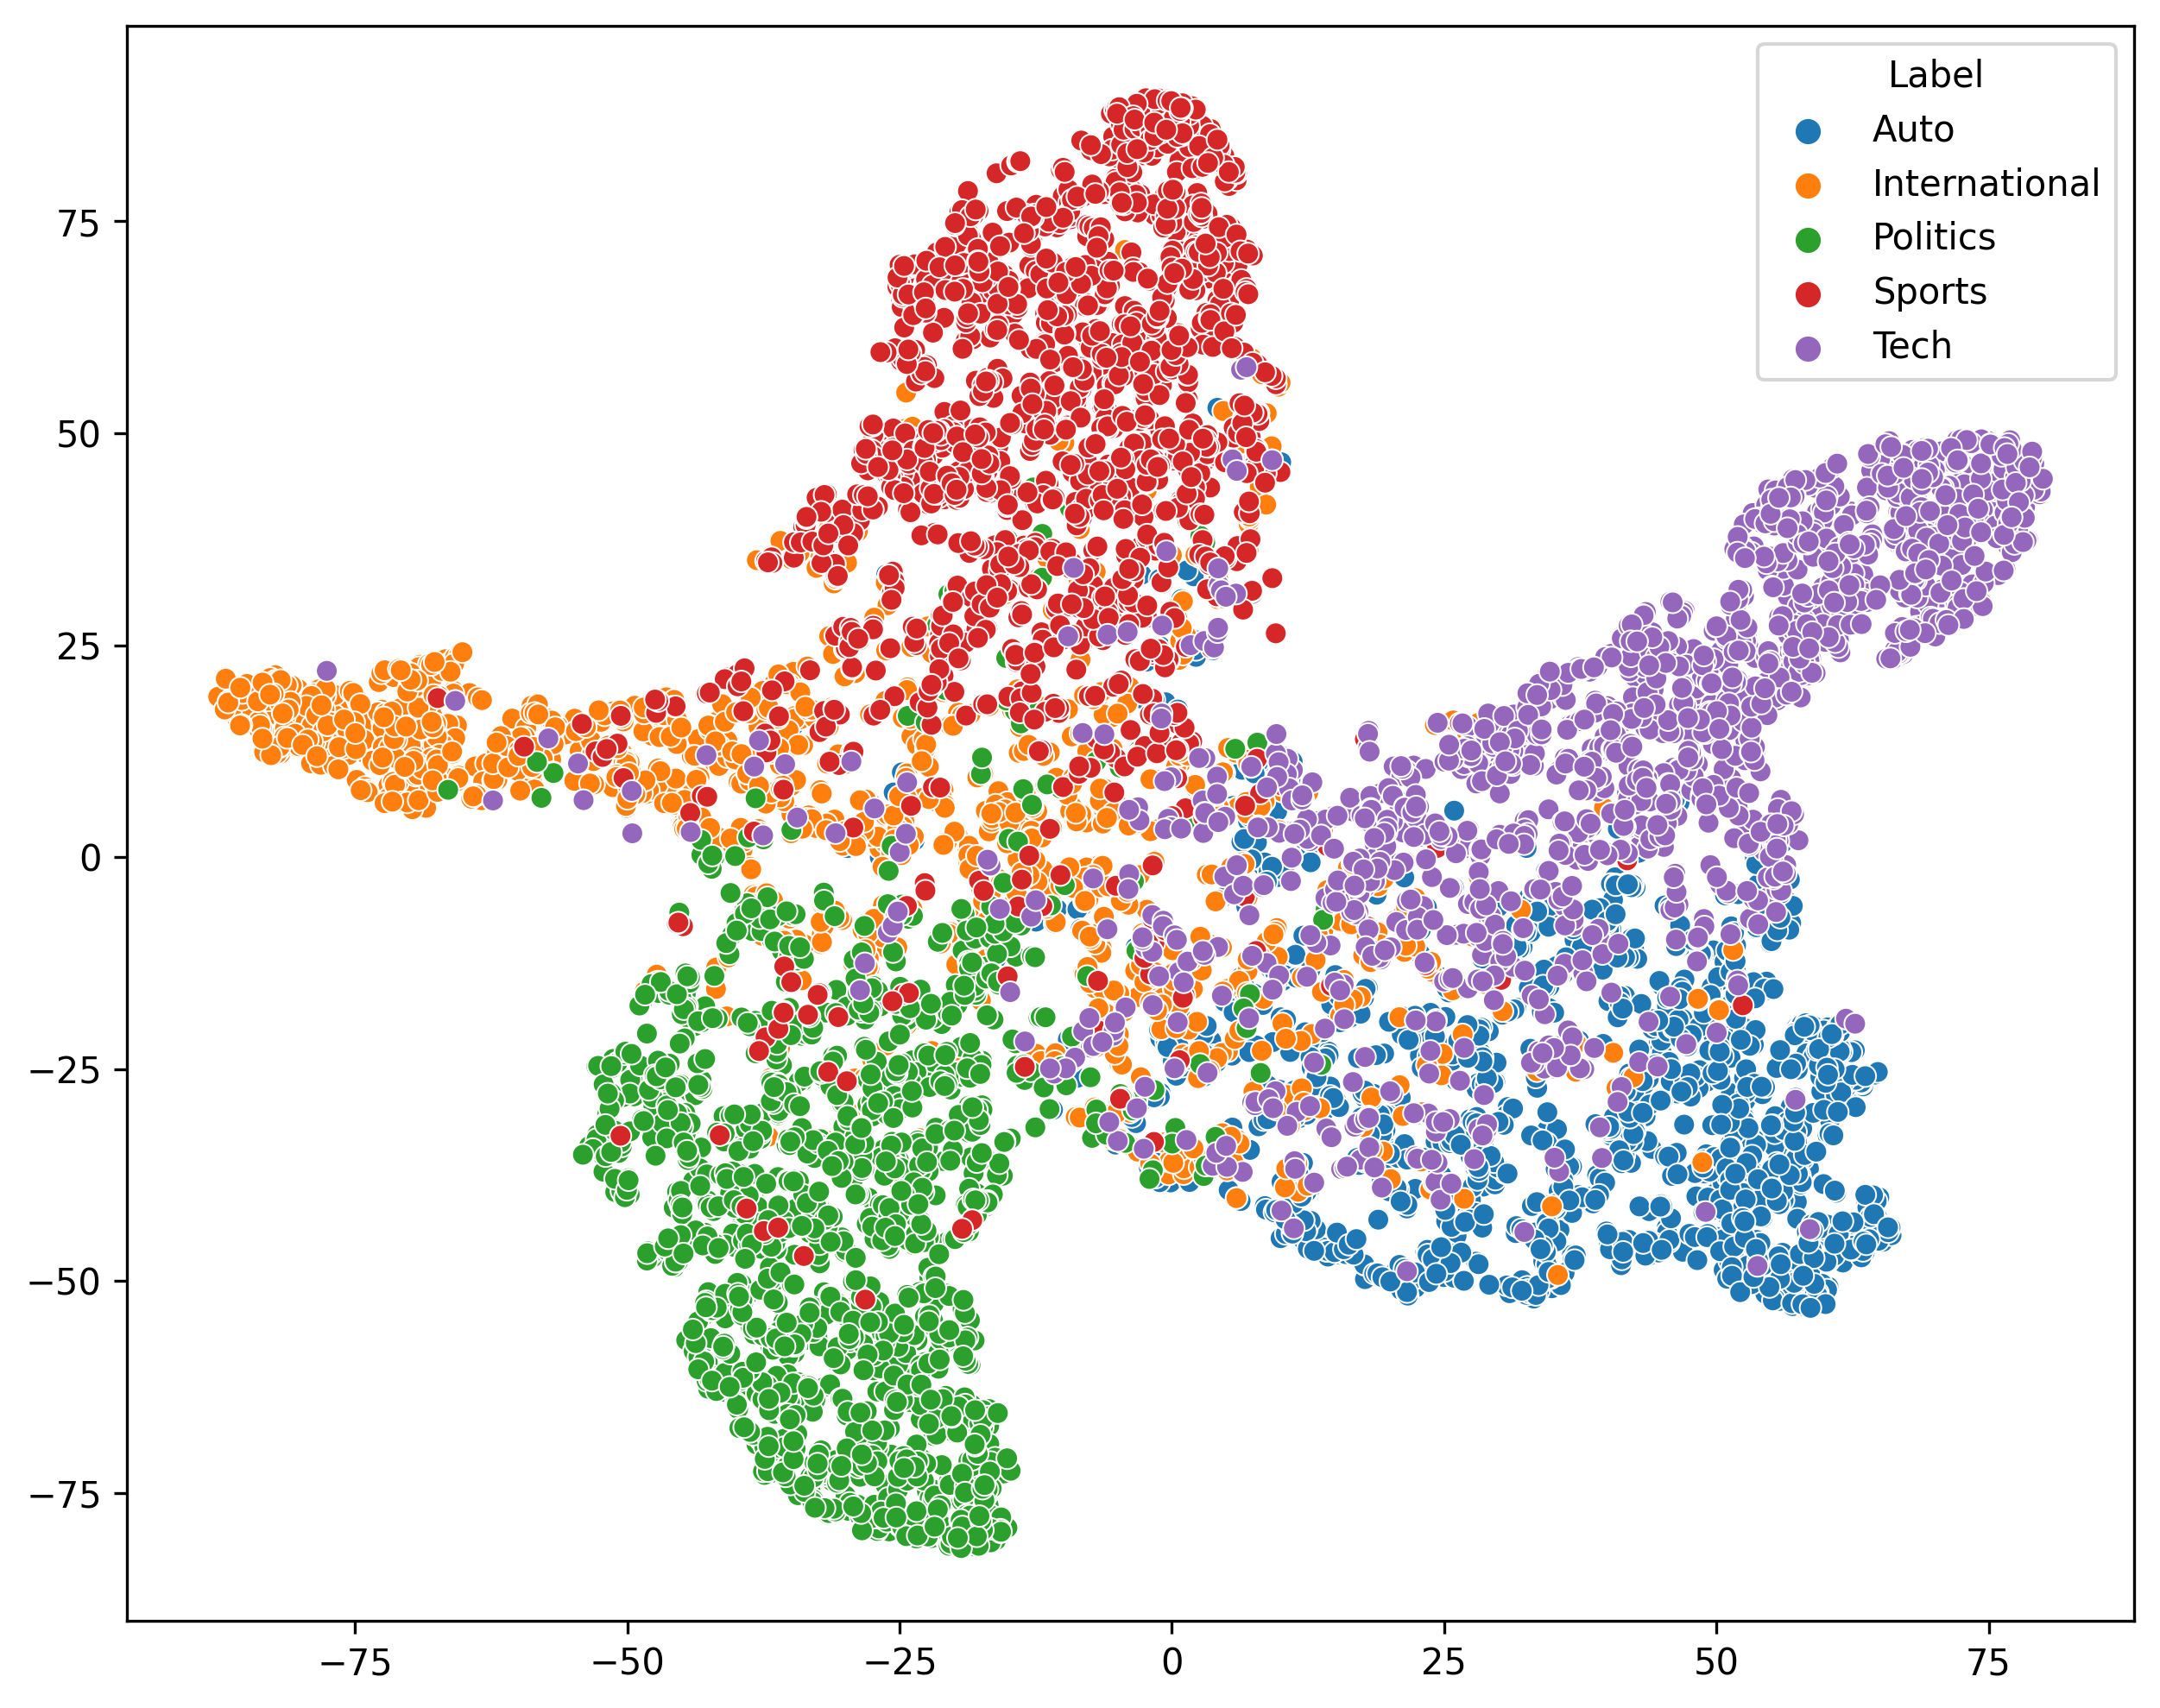

In [288]:
plt.figure(figsize=(10,8), dpi = 300)
sns.scatterplot(x=tsne_mat[:,0], y=tsne_mat[:,1], hue = df['Label'])
plt.savefig('LSA-Results.jpg')

# ***Gensim with LDA***

In [284]:
import re
def preprocess_text(text):
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    words = text.split()
    return words

In [285]:
news_df = df

In [286]:
docs = news_df['Text'].apply(preprocess_text)

In [287]:
docs

0       [केंद्र, सरकारचा, पेट्रोल, डिझेलवर, असला, तरीद...
1       [भारतीय, बाजारपेठेत, स्पेशियस, कार्सची, मागणी,...
2       [भारतीय, बाजारपेठेत, इलेक्ट्रीक, व्हेईकल, सेगम...
3       [पुण्यातील, उत्पादन, प्रकल्पात, नुकत्याच, लाँच...
4       [देशात, कार, खरेदी, लोकांची, संख्या, वाढताना, ...
                              ...                        
7995    [सध्या, कोलॅब, सुरु, गेममध्ये, इव्हेंट्स, बक्ष...
7996    [मच्छरचा, त्रास, उन्हाळ्यात, वाढतो, उपाय, मच्छ...
7997    [नवी, दिल्ली, फेसबुकच्या, मालकीच्या, युजर्ससाठ...
7998    [नवी, दिल्ली, पॉवरफुल, पोस्टपेड, प्लान, विचार,...
7999    [आठवड्यात, स्वस्त, भारतात, सादर, स्मार्टफोनचा,...
Name: Text, Length: 8000, dtype: object

In [289]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pickle

In [290]:
dictionary = corpora.Dictionary(docs)
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [291]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42, passes=5)

In [292]:
topics = lda_model.print_topics()
for topic in topics:
    print(topic)

(0, '0.006*"मस्क" + 0.005*"कार" + 0.005*"डेटा" + 0.005*"चेंडूंत" + 0.004*"प्लॅन" + 0.003*"तुम्हाला" + 0.003*"धावा" + 0.003*"प्लॅनमध्ये" + 0.003*"कंपनीने" + 0.002*"इलॉन"')
(1, '0.018*"देण्यात" + 0.011*"फोन" + 0.009*"कॅमेरा" + 0.008*"सादर" + 0.008*"स्मार्टफोन" + 0.007*"बॅटरी" + 0.007*"डिस्प्ले" + 0.007*"सेन्सर" + 0.007*"लाँच" + 0.007*"सपोर्ट"')
(2, '0.010*"धावा" + 0.009*"भारतीय" + 0.006*"सामना" + 0.006*"संघ" + 0.006*"सामन्यात" + 0.005*"बाद" + 0.004*"विराट" + 0.004*"चेंडूंत" + 0.004*"कर्णधार" + 0.004*"ट्वेंटी"')
(3, '0.012*"शिंदे" + 0.009*"ठाकरे" + 0.007*"उद्धव" + 0.005*"एकनाथ" + 0.005*"शिवसेना" + 0.005*"मुख्यमंत्री" + 0.004*"आमदार" + 0.004*"जात" + 0.003*"निवडणूक" + 0.003*"नेते"')
(4, '0.004*"माहिती" + 0.004*"सांगितले" + 0.003*"जात" + 0.003*"म्हटले" + 0.002*"असलेल्या" + 0.002*"रशियन" + 0.002*"काम" + 0.002*"लोक" + 0.002*"रशिया" + 0.002*"दोन"')


In [293]:
lda_model.save("lda_model.gensim")
dictionary.save("dictionary.gensim")

In [294]:
lda_m = LdaModel.load("lda_model.gensim")
gen_dict = corpora.Dictionary.load("dictionary.gensim")

In [301]:
new_text = "महिंद्रा ऑटोने नवीन इलेक्ट्रिक वाहनांचे उत्पादन सुरू केले: पुण्यातील उत्पादन सुविधेत आधुनिक तंत्रज्ञानाचा वापर करून विकसित केलेली ही कार, ऊर्जा बचतीचे आणि पर्यावरण संरक्षणाचे अनोखे वैशिष्ट्ये दर्शवते. उत्पादन प्रकरणात महान ग्राहकांना आकर्षित करण्यासाठी स्पर्धात्मक किमती आणि ऑफर्स दिल्या जात आहेत. आगामी काळात, या यशामुळे कंपनीला जागतिक बाजारपेठेत वाढ अपेक्षित आहे."
text = remove_stopwords(new_text)

In [302]:
text

'महिंद्रा ऑटोने नवीन इलेक्ट्रिक वाहनांचे उत्पादन केले: पुण्यातील उत्पादन सुविधेत आधुनिक तंत्रज्ञानाचा वापर विकसित केलेली कार, ऊर्जा बचतीचे पर्यावरण संरक्षणाचे अनोखे वैशिष्ट्ये दर्शवते. उत्पादन प्रकरणात महान ग्राहकांना आकर्षित स्पर्धात्मक किमती ऑफर्स दिल्या जात आहेत. आगामी काळात, यशामुळे कंपनीला जागतिक बाजारपेठेत वाढ अपेक्षित आहे.'

In [303]:
text = preprocess_text(text)
new_corpus = gen_dict.doc2bow(text)

In [312]:
topics = lda_m.get_document_topics(new_corpus, minimum_probability=0.0)
print("\nTopic distribution for News:")
print(topics)


Topic distribution for News:
[(0, 0.12248882), (1, 0.3999691), (2, 0.0051011886), (3, 0.00504199), (4, 0.46739885)]


***Topics-
0: Auto
1: Tech
2: Sports
3: Politics
4: International***

In [313]:
text2 = "नशीबाने मी तुम्ही बाजुला व्हा म्हणून बाजुला केले.उद्या जर त्या माझ्या अंगावर पडल्या असत्या तर मी काहीही बचाव करू शकलो नसतो.देवाने मला वाचविले, अशी प्रतिक्रिया जितेंद्र आव्हाड यांनी अटकपूर्व जामीन मिळाल्यानंतर दिली.यानंतर आव्हाड यांनी या महिलेवर गंभीर आरोप केले.एक दिवस ही महिला मुंब्र्याला आग लावल्याशिवाय राहणार नाही, अशा शब्दांत आव्हाड यांनी तक्रारदार महिलेवर टीका केली आहे.Jitendra Awhad Video: ती माझ्या अंगावर पडली असती तर...; जितेंद्र आव्हाडांनी केले गंभीर आरोपएवढ्या गर्दीत एकटी महिला कधी येत नाही.तिच्या डोक्यात आधीच प्लॅन होता.ती मुद्दामहून समोरून चालत येत होती.हा पूर्वनियोजित कट होता.एवढे नीच राजकारण ही महिला मुंब्र्यात आल्यानंतर सुरु झालेय.छट पुजेत असेच कांगावे केले.तिचा व्हिडीओ व्हायरल झालाय.तिने अनेक पुरुषांना त्रास दिला आहे.आरएसएसचे पुराणिक म्हणून आहेत, तिने त्यांचे काय केलेय हे पहा.हे तिचे हक्काचे प्रयोग आहेत.ही महिला एके दिवशी मुंब्र्याला आग लावेल, याचे आज मी भाकीत करतोय, अशी टीका आव्हाड यांनी केली.अंजली दमानियांशी आमच्या वेगळ्या लढाया असतात.जितेंद्र आव्हाड असे काही करेल यावर विश्वास बसत नाही या भगिनींच्या भावना सुखावणाऱ्या आहेत, अशा शब्दांत आव्हाड यांनी आभार मानले.प्रीती शर्मा मेनन सारख्या महिलांशी आमचे विविध गोष्टींवरून वाद आहेत.या सर्व महिला माझ्या बाजुने उभ्या राहिल्या.मी काय कमावले, हेच कमावले, असे सांगत आव्हाड भावूक झाले.ज्या पद्धतीने पोलीस वागतायत ते वाईट आहे.शपथ घेताना जे म्हटलेले त्यानुसार वागायला पाहिजे.तुम्ही कोणत्याही सरकारचे नोकर नसता.सरकारी नोकर असता, यामुळे कायद्यानेच वागले पाहिजे होते, असेही आव्हाड म्हणाले."

In [314]:
text2 = remove_stopwords(text2)
text2 = preprocess_text(text2)

In [315]:
text2

['नशीबाने',
 'बाजुला',
 'व्हा',
 'बाजुला',
 'केलेउद्या',
 'माझ्या',
 'अंगावर',
 'पडल्या',
 'असत्या',
 'बचाव',
 'शकलो',
 'नसतोदेवाने',
 'वाचविले',
 'प्रतिक्रिया',
 'जितेंद्र',
 'आव्हाड',
 'अटकपूर्व',
 'जामीन',
 'मिळाल्यानंतर',
 'दिलीयानंतर',
 'आव्हाड',
 'महिलेवर',
 'गंभीर',
 'आरोप',
 'केलेएक',
 'दिवस',
 'महिला',
 'मुंब्र्याला',
 'आग',
 'लावल्याशिवाय',
 'राहणार',
 'नाही',
 'शब्दांत',
 'आव्हाड',
 'तक्रारदार',
 'महिलेवर',
 'टीका',
 'आहे',
 'माझ्या',
 'अंगावर',
 'पडली',
 'असती',
 'तर',
 'जितेंद्र',
 'आव्हाडांनी',
 'गंभीर',
 'आरोपएवढ्या',
 'गर्दीत',
 'एकटी',
 'महिला',
 'नाहीतिच्या',
 'डोक्यात',
 'आधीच',
 'प्लॅन',
 'होताती',
 'मुद्दामहून',
 'समोरून',
 'चालत',
 'होतीहा',
 'पूर्वनियोजित',
 'कट',
 'होताएवढे',
 'नीच',
 'राजकारण',
 'महिला',
 'मुंब्र्यात',
 'आल्यानंतर',
 'सुरु',
 'झालेयछट',
 'पुजेत',
 'असेच',
 'कांगावे',
 'केलेतिचा',
 'व्हिडीओ',
 'व्हायरल',
 'झालायतिने',
 'पुरुषांना',
 'त्रास',
 'दिला',
 'आहेआरएसएसचे',
 'पुराणिक',
 'आहेत',
 'केलेय',
 'पहाहे',
 'हक्काचे',
 'प्रयोग',
 'आहेतही',
 'महि

In [317]:
new_corpus = gen_dict.doc2bow(text2)
topics = lda_m.get_document_topics(new_corpus, minimum_probability=0.0)
print("\nTopic distribution for News:")
print(topics)


Topic distribution for News:
[(0, 0.015513223), (1, 0.0017862911), (2, 0.06708848), (3, 0.7322745), (4, 0.18333751)]


In [318]:
'''
Algorithm required :
1. Gather Distributions
2. Sort probabilities
3. Three Cases : 1 dominant Label, 2 Labels & 3 Labels
Threshold For 1 Label (p) >= 0.6 (0.65?)
2 Labels (p1) + (p2) >= 0.75 (0.80?)
3 Labels (p1) + (p2) + (p3) >= 0.75
''' 

'\nAlgorithm required :\n1. Gather Distributions\n2. Sort probabilities\n3. Three Cases : 1 dominant Label, 2 Labels & 3 Labels\nThreshold For 1 Label (p) >= 0.6 (0.65?)\n2 Labels (p1) + (p2) >= 0.75 (0.80?)\n3 Labels (p1) + (p2) + (p3) >= 0.75\n'

In [320]:
'''
Additionally you can use this function to find coherence values and determine
suitable number of topics

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100, update_every=1, alpha='auto', per_word_topics=True,
                                                chunksize=1000, passes=35, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
'''

"\nAdditionally you can use this function to find coherence values and determine\nsuitable number of topics\n\ndef compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):\n    coherence_values = []\n    model_list = []\n    for num_topics in range(start, limit, step):\n        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,random_state=100, update_every=1, alpha='auto', per_word_topics=True,\n                                                chunksize=1000, passes=35, iterations=100)\n        model_list.append(model)\n        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')\n        coherence_values.append(coherencemodel.get_coherence())\n\n    return model_list, coherence_values\n"